<a href="https://colab.research.google.com/github/shashankdubey78/CAP5610_ML/blob/main/Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise
import pandas as pd
import numpy as np

from surprise import Dataset, BaselineOnly, Reader
from surprise import SVD, KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import Image
init_notebook_mode(connected=True)
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.4 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633967 sha256=9515220041ef442464ae7d202e0f14955b433f2e8c02f16570037598b1e260de
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


### 3 - A).Reading Ratings_Small CSV File from Reader() using line format mentioned in the question UserID, MovieID, (in file, its mentioned as User, Item respectively).

In [7]:
FILE_PATH_ = "ratings_small.csv"
reader = Reader(line_format="user item rating timestamp", sep=',', skip_lines=1)
dataset = Dataset.load_from_file(FILE_PATH_, reader=reader)
rating_df = pd.read_csv("ratings_small.csv")

In [5]:
rating_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


### 3 - B). MAE & RMSE : RMSE is the Square Root of Squares of Mean of Deviations whereas MAE is the Mean Absolute Error which is the mean of absolute difference between actual value and predicted value.

### 3 - C). Average MAE & RMSE of PMF, User based, item based using 5 fold cross validation.

In [8]:
def runAlgorithmNamesCrossValidation(algorithm_Names, cv=5):
	meanValues = {}
	for algoName in algorithm_Names:
		out = cross_validate(algorithm_Names[algoName], dataset, measures=['RMSE', 'MAE'], cv=5, verbose=False)
		results = pd.DataFrame.from_dict(out)
		meanValues[algoName] = results.mean()
	benchmarkValues = pd.DataFrame.from_dict(meanValues, orient='index')
	benchmarkValues.drop(columns=['fit_time', 'test_time'], inplace=True)
	return benchmarkValues


*   PMF -> SVD(biased=False) { reference }
*   User Based -> KNNBasic(sim_options={'user_based': True}) { reference }
*   Item Based -> KNNBasic(sim_options={'user_based': False}) { reference }

In [9]:
algorithm_names = {
	'PMF': SVD(biased=False),
	'User_Based': KNNBasic(sim_options={'user_based': True}),
	'Item_Based': KNNBasic(sim_options={'user_based': False})
}

benchmark_Names = runAlgorithmNamesCrossValidation(algorithm_names)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


### 3 - D). Compare mean of User-Based, Item-Based, PMF with RMSE & MAE.(10 points)

##### Here, Item based feature has clearly the lowest RMSE and MAE, hence, item based has the best model

In [10]:
benchmark_Names

,test_rmse,test_mae
PMF,1.007808,0.778412
User_Based,0.968598,0.744144
Item_Based,0.935549,0.721468


### 3 - E). How MSD, Cosine and Pearson similarity is affecting the User-Based & Item-Based COllaborative Filtering? Is impact on Item-Based is same as impact on User-Based? Plot Graph

In [41]:
similarity_metrics = ['cosine', 'pearson', 'msd']

UserBasedAlgoSimilarities = {}
for similarity in similarity_metrics:
	UserBasedAlgoSimilarities['UserBased-"' + similarity.upper()+'"'] = KNNBasic(sim_options={'name': similarity, 'user_based': True})

ItemBasedAlgoSimilarities = {}
for similarity in similarity_metrics:
	ItemBasedAlgoSimilarities['ItemBased-"' + similarity.upper()+'"'] = KNNBasic(sim_options={'name': similarity, 'user_based': False})

UserBased_BenchmarksSimilarities = runAlgorithmNamesCrossValidation(UserBasedAlgoSimilarities)
ItemBased_BenchmarksSimilarities = runAlgorithmNamesCrossValidation(ItemBasedAlgoSimilarities)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the ms

In [45]:
UserBased_BenchmarksSimilarities.sort_values('test_rmse').style.background_gradient(axis=0, cmap ='cool_r').set_properties(**{'font-size': '18px'})

,test_rmse,test_mae
"UserBased-""MSD""",0.967246,0.743777
"UserBased-""COSINE""",0.992538,0.766968
"UserBased-""PEARSON""",0.997881,0.772170


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fded9a70790>,
      dtype=object)

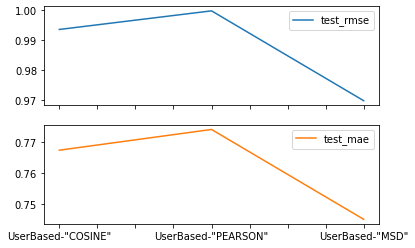

In [16]:
UserBased_BenchmarksSimilarities.plot(subplots=True)



*   ### Here in the above graph, for UserBased MSD is the best and Cosine is slighly better than Pearson




In [44]:
ItemBased_BenchmarksSimilarities.sort_values('test_rmse').style.background_gradient(axis=0, cmap ='cool_r').set_properties(**{'font-size': '18px'})


,test_rmse,test_mae
"ItemBased-""MSD""",0.933333,0.720041
"ItemBased-""PEARSON""",0.989955,0.768371
"ItemBased-""COSINE""",0.995157,0.774446


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fded9c92e10>,
      dtype=object)

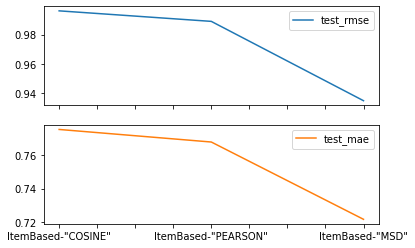

In [17]:
ItemBased_BenchmarksSimilarities.plot(subplots=True)



*   ### Here in the above graph, for ItemBased MSD is the best and Pearson is slightly better than Cosine




### 3 - D). How is neighbour impacting User and Item based.(10 points)

In [11]:
# here KNN is ranging from 1 to 29

algorithmNamesUser = {}
for i in range(1,30):
	algorithmNamesUser['KNN_User ->' + str(i)] = KNNBasic(k=i, sim_options={'user_based': True})
UserBased_Benchmarks = runAlgorithmNamesCrossValidation(algorithmNamesUser)

algorithmNamesItems = {}
for i in range(1,30):
	algorithmNamesItems['KNN_Item ->' + str(i)] = KNNBasic(k=i, sim_options={'user_based': False})
ItemBased_Benchmarks = runAlgorithmNamesCrossValidation(algorithmNamesItems, cv=3)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

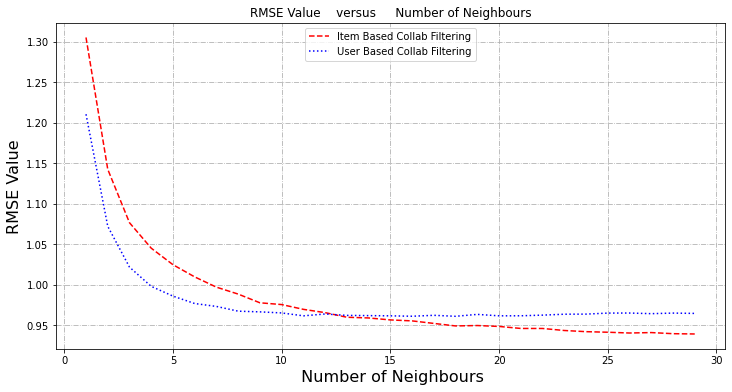

In [34]:
target = 'test_rmse'
knnRange = range(1,30)

plt.figure(figsize=(12,6))
plt.plot(knnRange, ItemBased_Benchmarks[target], label = "Item Based Collab Filtering", color='r', ls='--')
plt.plot(knnRange, UserBased_Benchmarks[target], label = "User Based Collab Filtering", color='b', ls='dotted')
plt.xlabel(' Number of Neighbours', fontsize=16)
plt.ylabel('RMSE Value', fontsize=16)
plt.title('RMSE Value' + '    versus    ' + ' Number of Neighbours')
plt.legend(loc='upper center')
plt.grid(ls='dashdot')

plt.show()

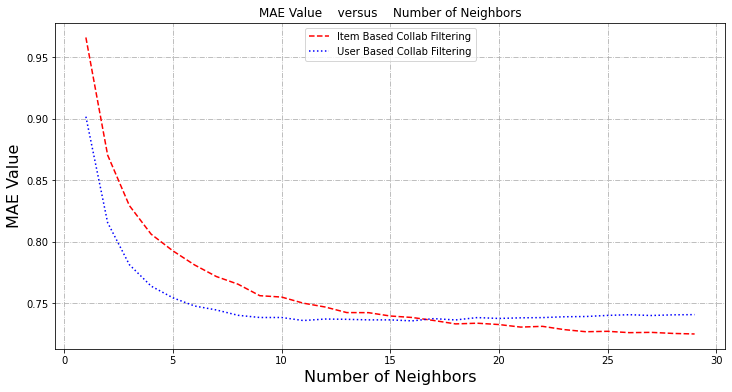

In [35]:
target = 'test_mae'
knnRange = range(1,30)

plt.figure(figsize=(12,6))
plt.plot(knnRange, ItemBased_Benchmarks[target], label = "Item Based Collab Filtering", color='r', ls='--')
plt.plot(knnRange, UserBased_Benchmarks[target], label = "User Based Collab Filtering", color='b', ls='dotted')
plt.xlabel('Number of Neighbors', fontsize=16)
plt.ylabel('MAE Value', fontsize=16)
plt.title('MAE Value' + '    versus    ' + 'Number of Neighbors')
plt.legend(loc='upper center')
plt.grid(ls='dashdot')

plt.show()

### What are the best neighbours for User Items in RMSE? Does User & Item both have same best K?

In [46]:
mae = 'test_mae'
rmse = 'test_rmse'

best_neighbours = {
	'RMSE_UserBased': (UserBased_Benchmarks[rmse].idxmin(), UserBased_Benchmarks[rmse].min()),
	'MAE_UserBased': (UserBased_Benchmarks[mae].idxmin(), UserBased_Benchmarks[mae].min()),
	'RMSE_ItemBased': (ItemBased_Benchmarks[rmse].idxmin(), ItemBased_Benchmarks[rmse].min()),
	'MAE_ItemBased': (ItemBased_Benchmarks[mae].idxmin(), ItemBased_Benchmarks[mae].min())
}

pd.DataFrame.from_dict(best_neighbours,  columns=['Best K', 'Error Measure'], orient='index').style.background_gradient(axis=0, cmap ='cool_r').set_properties(**{'font-size': '18px'})

,Best K,Error Measure
RMSE_UserBased,KNN_User ->18,0.961242
MAE_UserBased,KNN_User ->16,0.735801
RMSE_ItemBased,KNN_Item ->29,0.939434
MAE_ItemBased,KNN_Item ->29,0.725145




*   User_Based -> Best value for K = 18 with RMSE = 0.961242, and Best Value for K = 16 with MAE = 0.735801.

* Item_Based -> Best value for K = 29 with RMSE = 0.939434 and MAE = 0.725145.

* Value of K is varrying for different collaborative filtering, in User_Based value of K is different for RMSE and MAE.

